In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [1]:
#def of class #to be factored out in a module

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


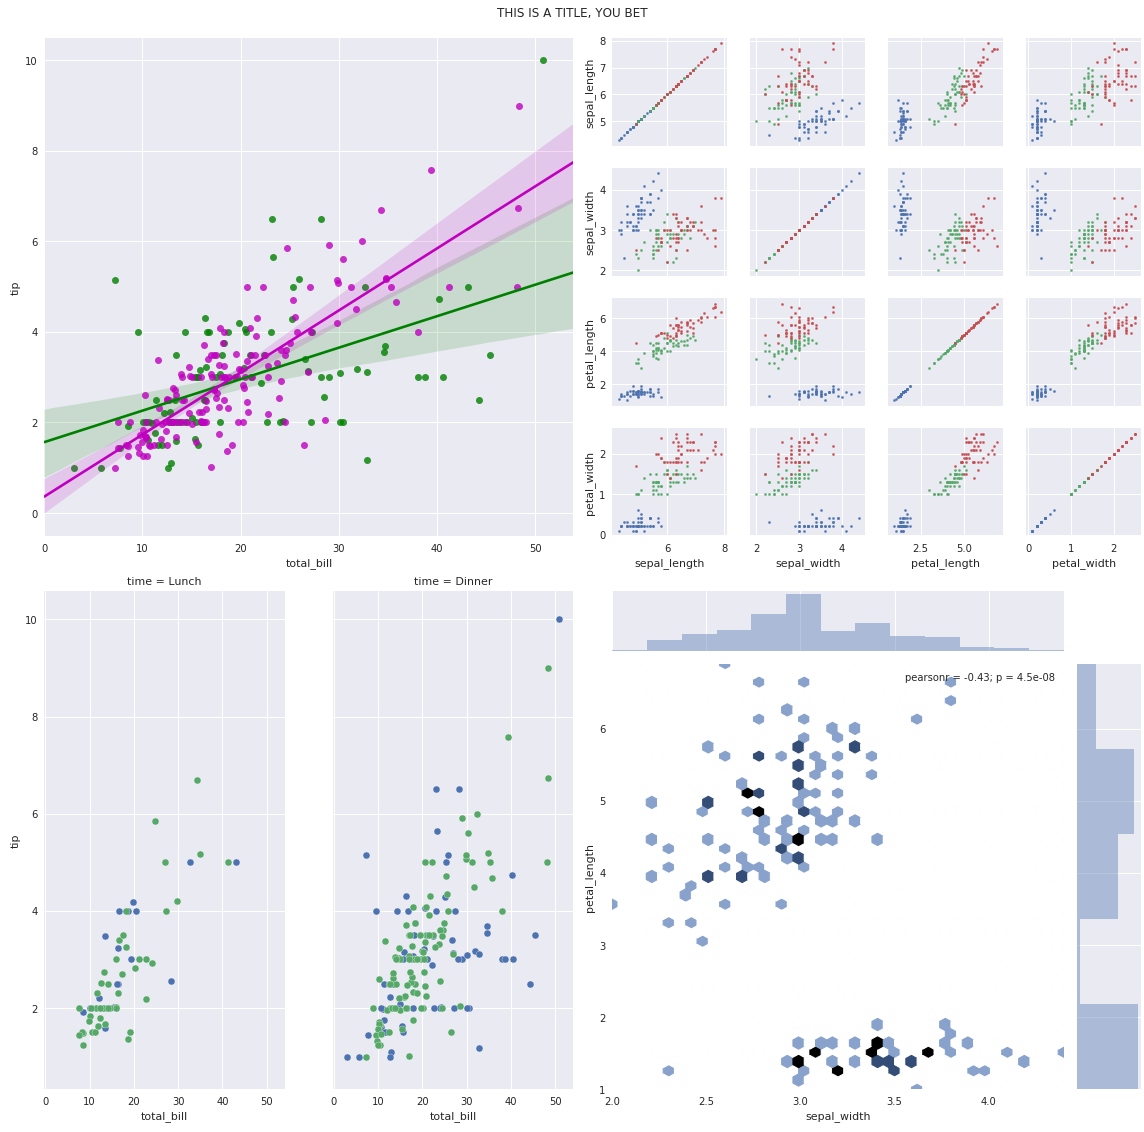

In [37]:
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

# An lmplot
g0 = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, 
                palette=dict(Yes="g", No="m"))
# A PairGrid
g1 = sns.PairGrid(iris, hue="species")
g1.map(plt.scatter, s=5)
# A FacetGrid
g2 = sns.FacetGrid(tips, col="time",  hue="smoker")
g2.map(plt.scatter, "total_bill", "tip", edgecolor="w")
# A JointGrid
#g3 = sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde", space=0, color="g")
g3 = sns.jointplot("sepal_width", "petal_length", data=iris,kind="hex", size=2, joint_kws={'gridsize':40})


fig = plt.figure(figsize=(16,16))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig)
#gs.update(top=0.7)


gs.update(top=0.95)
fig.suptitle('THIS IS A TITLE, YOU BET')
plt.show()

In [27]:
iris.shape

(150, 5)